In [1]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model

from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout, Bidirectional

from numpy import asarray
from numpy import zeros

from numpy import asarray
from numpy import zeros
from tensorflow.keras.layers import GRU

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.layers import Flatten


import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
!pip install kaggle

In [3]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 89% 23.0M/25.7M [00:00<00:00, 238MB/s]
100% 25.7M/25.7M [00:00<00:00, 250MB/s]


In [4]:
!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [2]:
raw_data = pd.read_csv("IMDB Dataset.csv")
print(raw_data.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [24]:
raw_data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [3]:
X = raw_data['review']  # Features: reviews
raw_data['label'] = raw_data['sentiment'].map({'positive': 1, 'negative': 0})
y = raw_data['label']  # Labels: sentiment (positive/negative)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 40000
Testing set size: 10000


In [4]:

def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    # words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [5]:
def normalize_corpus(corpus):
  return [normalize_text(t) for t in corpus]

In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
proc_X_train = normalize_corpus(X_train)
proc_X_test = normalize_corpus(X_test)

In [24]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2025-01-24 23:38:32--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-01-24 23:38:32--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-01-24 23:38:32--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [25]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [8]:
#read glove data
embeddings_index = dict()
f = open('glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()



In [9]:
#show glove in dataframe
df = pd.DataFrame(embeddings_index.items())
df.head()


,0,1
0,the,"[-0.038194, -0.24487, 0.72812, -0.39961, 0.083..."
1,",","[-0.10767, 0.11053, 0.59812, -0.54361, 0.67396..."
2,.,"[-0.33979, 0.20941, 0.46348, -0.64792, -0.3837..."
3,of,"[-0.1529, -0.24279, 0.89837, 0.16996, 0.53516,..."
4,to,"[-0.1897, 0.050024, 0.19084, -0.049184, -0.089..."


In [10]:
# Prepare tokenizer
t = Tokenizer()
t.fit_on_texts(proc_X_train)  # Fit on training data only
vocab_size = len(t.word_index) + 1

# Integer encode the training documents
encoded_train_docs = t.texts_to_sequences(proc_X_train)
# Integer encode the testing documents
encoded_test_docs = t.texts_to_sequences(proc_X_test)

# Pad documents to a max length of 100 words (adjust as necessary)
max_length = 100
padded_train_docs = pad_sequences(encoded_train_docs, maxlen=max_length, padding='post')
padded_test_docs = pad_sequences(encoded_test_docs, maxlen=max_length, padding='post')

# Load the whole embedding into memory (make sure to have the GloVe file)
embeddings_index = dict()
with open('glove.6B.100d.txt', mode='rt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
print('Loaded %s word vectors.' % len(embeddings_index))

# Create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector



Loaded 400001 word vectors.


In [11]:
# Define model using GRU
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_length, trainable=False))
model.add(GRU(100))  # GRU layer
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# Summarize the model
model.summary()




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      12,297,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,297,500 (46.91 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 12,297,500 (46.91 MB)

In [12]:
#make check piont for model
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_acc', verbose=1, save_best_only=True, mode='max')


In [13]:
#early stop
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [14]:
# Fit the model
history  = model.fit(padded_train_docs, y_train, epochs=6, batch_size=32, validation_split=0.2 , validation_data=(padded_test_docs, y_test), callbacks= [checkpoint]  )


Epoch 1/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - acc: 0.6792 - loss: 0.5682
Epoch 1: val_acc improved from -inf to 0.84640, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 129s 101ms/step - acc: 0.6792 - loss: 0.5681 - val_acc: 0.8464 - val_loss: 0.3531
Epoch 2/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - acc: 0.8485 - loss: 0.3544
Epoch 2: val_acc improved from 0.84640 to 0.86400, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 101ms/step - acc: 0.8485 - loss: 0.3544 - val_acc: 0.8640 - val_loss: 0.3248
Epoch 3/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - acc: 0.8685 - loss: 0.3117
Epoch 3: val_acc improved from 0.86400 to 0.86480, saving model to best_model.keras
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 150s 107ms/step - acc: 0.8685 - loss: 0.3117 - val_acc: 0.8648 - val_loss: 0.3098
Epoch 4/6
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - acc: 0.8778 - loss: 0.2909
Epoch 4: val_acc improved from 0.86480 to 0.87140, saving model to best_model.ke

In [15]:

# Evaluate the model on the test set
loss, accuracy = model.evaluate(padded_test_docs, y_test, verbose=0)
print('Test Accuracy: %f' % (accuracy * 100))

Test Accuracy: 87.140000


In [16]:
# val_acc , val_lose
val_acc = history.history['val_acc'][-1]
val_loss = history.history['val_loss'][-1]
print(val_acc)
print(val_loss)

0.871399998664856
0.3143157958984375


<Figure size 640x480 with 0 Axes>

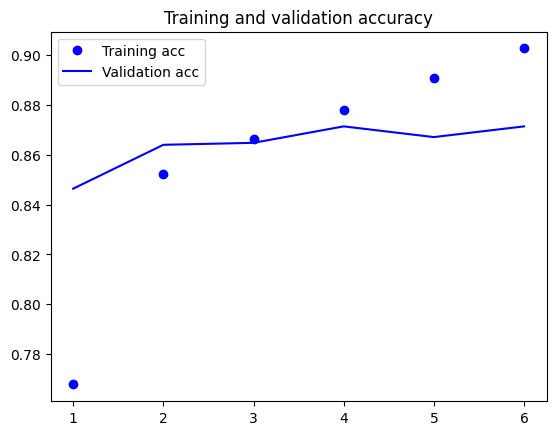

<Figure size 640x480 with 0 Axes>

In [17]:
#show accuracy of model and val_acc
import matplotlib.pyplot as plt
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()


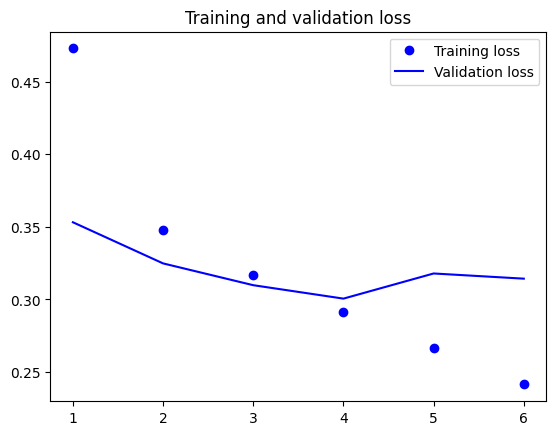

In [18]:
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
loss = history.history['loss']
acc = history.history['acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [23]:
#save model.keras
model.save('model_imdb.keras')

In [31]:
#make prediction
model = models.load_model('model_imdb.keras')
test_review = "i  hate  "
test_review = normalize_text(test_review)
test_review = t.texts_to_sequences([test_review])
test_review = pad_sequences(test_review, maxlen=max_length, padding='post')
prediction = model.predict(test_review)
print("Predicted sentiment:", "positive" if prediction > 0.5 else "negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step
Predicted sentiment: negative


In [32]:
#make prediction with streamlit
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
model = models.load_model('model_imdb.keras')
test_review = st.text_input("Enter a review:")
test_review = normalize_text(test_review)
test_review = t.texts_to_sequences([test_review])
test_review = pad_sequences(test_review, maxlen=max_length, padding='post')
prediction = model.predict(test_review)
st.write("Predicted sentiment:", "positive" if prediction > 0.5 else "negative")


2025-01-25 02:08:43.628 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 02:08:43.630 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 02:08:43.633 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 02:08:43.635 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 02:08:43.637 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-01-25 02:08:43.639 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


2025-01-25 02:08:45.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 02:08:45.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 02:08:45.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-25 02:08:45.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [33]:
#load tokenizer.pkl
import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(t, handle, protocol=pickle.HIGHEST_PROTOCOL)